https://youtu.be/E-io76NlsqA
## ML lab 06-2: TensorFlow로 Fancy Softmax Classification의 구현하기
### cross_entropy, one_hot, reshape

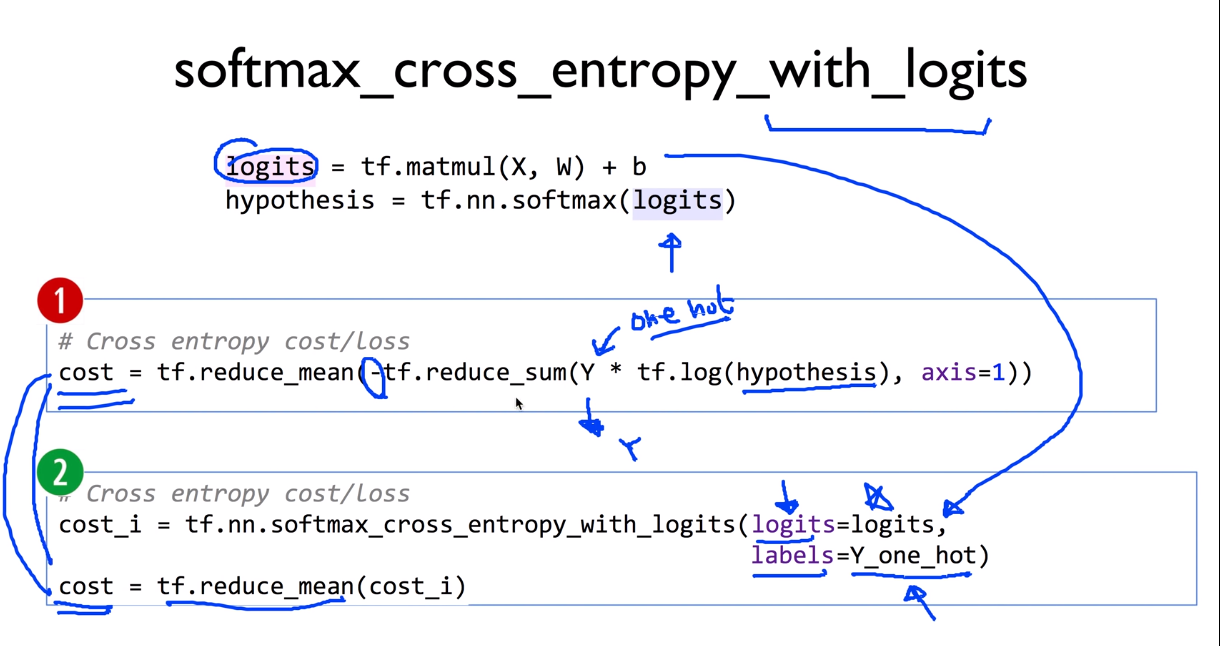

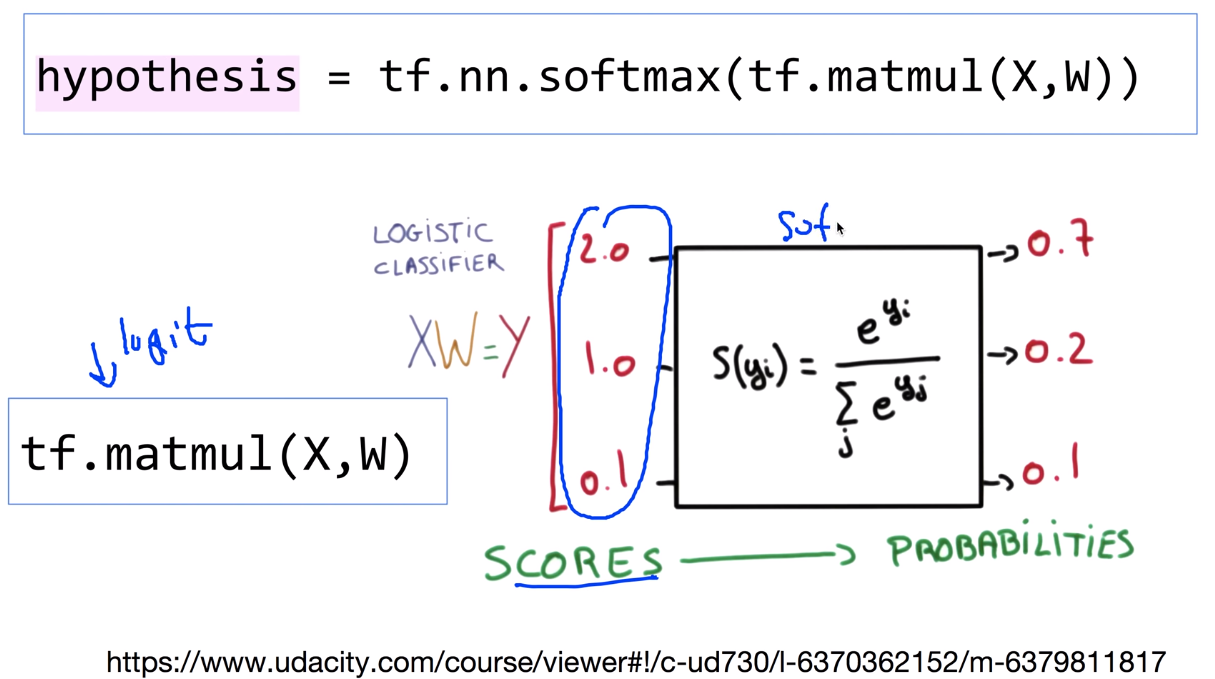

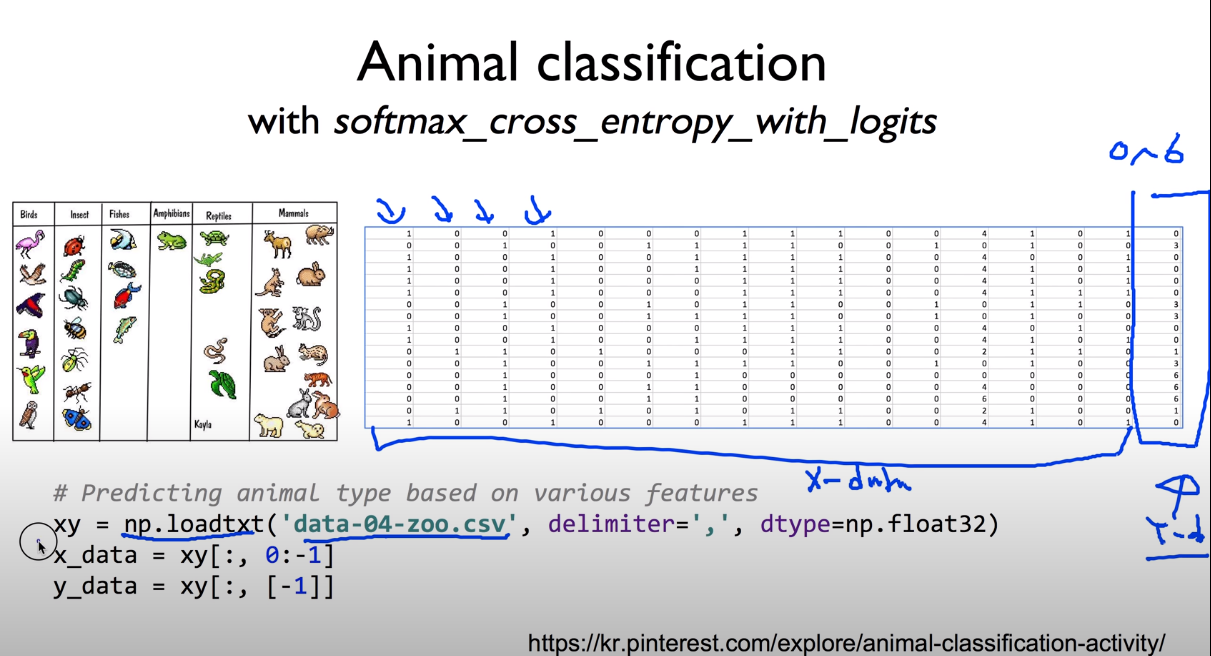

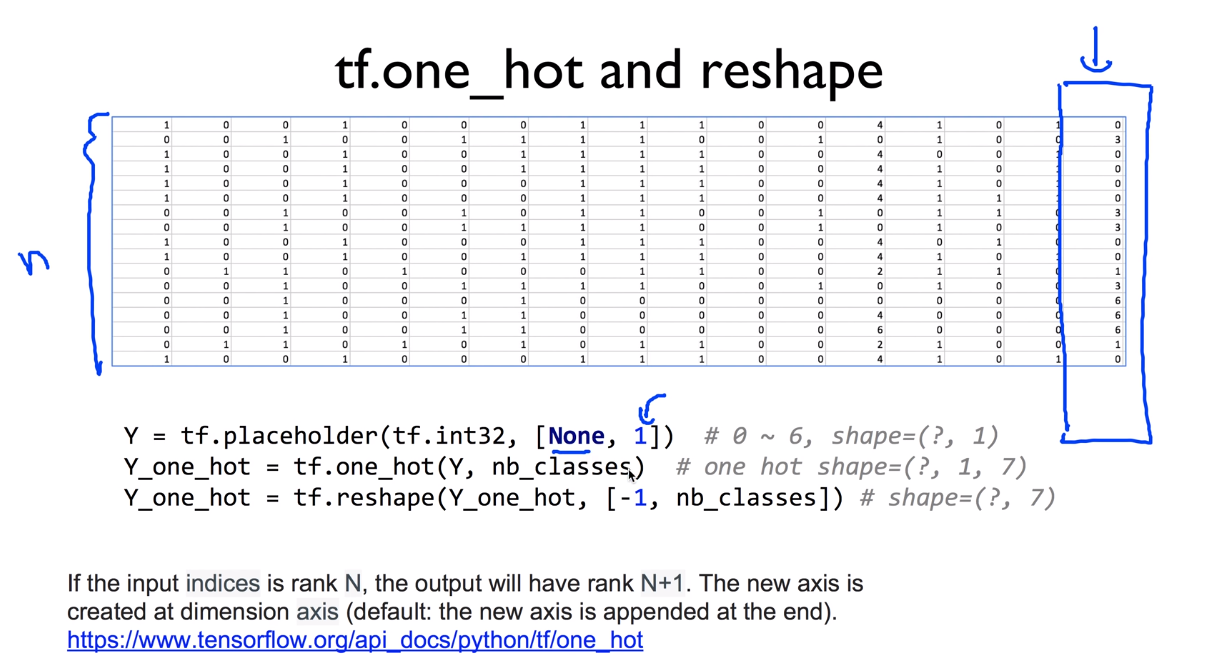

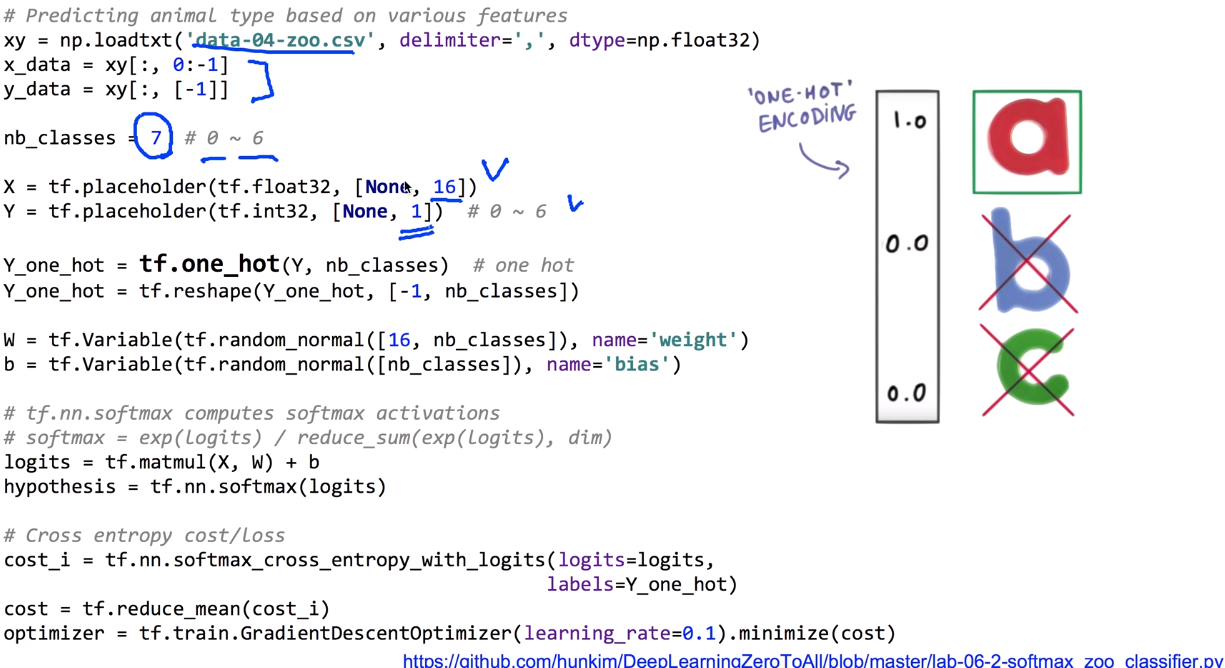

In [17]:
import tensorflow as tf
import numpy as np
tf.compat.v1.disable_eager_execution()

xy = np.loadtxt('./data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

nb_classes = 7 # 0~6까지의 숫자

X = tf.compat.v1.placeholder(tf.float32, [None, 16]) # 16인 이유, X의 특징을 나타내는 수가 16개
Y = tf.compat.v1.placeholder(tf.int32, [None, 1]) # 0~6, shape=(?, 1)

Y_one_hot = tf.compat.v1.one_hot(Y, nb_classes) # one hot shape=(?, 1, 7)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes]) # shape=(?, 7) rank를 원하는 모양으로 바꾸기

W = tf.Variable(tf.compat.v1.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.compat.v1.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# Cross entropy cost / loss
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_one_hot)

cost = tf.reduce_mean(cost_i)
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch graph
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())
    
for step in range(2000):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
    if step % 100 == 0:
        loss, acc = sess.run([cost, accuracy], feed_dict={X:x_data, Y:y_data})
        print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

            
# Let's see if we can predict
pred = sess.run(prediction, feed_dict={X:x_data})


# y_data: (N, 1) = flatten => (N, ) matches pred.shape
for p, y in zip(pred, y_data.flatten()):
    print("[{}] Prediction: {} True Y: {}".format(p==int(y), p, int(y)))

sess.close()

Step:     0	Loss: 7.825	Acc: 11.88%
Step:   100	Loss: 0.683	Acc: 83.17%
Step:   200	Loss: 0.413	Acc: 91.09%
Step:   300	Loss: 0.301	Acc: 94.06%
Step:   400	Loss: 0.239	Acc: 95.05%
Step:   500	Loss: 0.199	Acc: 96.04%
Step:   600	Loss: 0.171	Acc: 96.04%
Step:   700	Loss: 0.149	Acc: 97.03%
Step:   800	Loss: 0.132	Acc: 97.03%
Step:   900	Loss: 0.118	Acc: 97.03%
Step:  1000	Loss: 0.107	Acc: 98.02%
Step:  1100	Loss: 0.097	Acc: 100.00%
Step:  1200	Loss: 0.089	Acc: 100.00%
Step:  1300	Loss: 0.083	Acc: 100.00%
Step:  1400	Loss: 0.077	Acc: 100.00%
Step:  1500	Loss: 0.072	Acc: 100.00%
Step:  1600	Loss: 0.067	Acc: 100.00%
Step:  1700	Loss: 0.063	Acc: 100.00%
Step:  1800	Loss: 0.060	Acc: 100.00%
Step:  1900	Loss: 0.057	Acc: 100.00%
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 Tr